In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = '/Users/aymericvie/Documents/GitHub/evology/evology/data/replication/empirical_funds/flow_data.csv'
df = pd.read_csv(path)


In [76]:
print(df.columns)

Index(['Unnamed: 0', 'cik', 'series_id', 'form', 'report_date', 'as_of_date',
       'total_assets', 'total_liabilities', 'net_assets',
       'month_1_flow_redemption', 'month_1_flow_reinvestment',
       'month_1_flow_sales', 'month_2_flow_redemption',
       'month_2_flow_reinvestment', 'month_2_flow_sales',
       'month_3_flow_redemption', 'month_3_flow_reinvestment',
       'month_3_flow_sales'],
      dtype='object')


In [77]:
sum_net_assets = df['net_assets'].sum()
sum_changes_month1 = df['month_1_flow_redemption'].sum() + df['month_1_flow_sales'].sum() + df['month_1_flow_reinvestment'].sum()

variation_month_1 = 100 * abs(sum_changes_month1 / sum_net_assets)
print(variation_month_1)

sum_changes_month2 = df['month_2_flow_redemption'].sum() + df['month_2_flow_sales'].sum() + df['month_2_flow_reinvestment'].sum()

variation_month_2 = 100 * abs(sum_changes_month2 / sum_net_assets)
print(variation_month_2)

sum_changes_month3 = df['month_3_flow_redemption'].sum() + df['month_3_flow_sales'].sum() + df['month_3_flow_reinvestment'].sum()

variation_month_3 = 100 * abs(sum_changes_month3 / sum_net_assets)
print(variation_month_3)

print('Average ' + str(variation_month_1 / 3 + variation_month_2 / 3 + variation_month_3 / 3))

sum_redemptions = abs(df['month_3_flow_redemption']).sum() + abs(df['month_2_flow_redemption']).sum() + abs(df['month_1_flow_redemption']).sum()
percentage_redemptions = 100 * sum_redemptions / sum_net_assets
print(percentage_redemptions)

4.466510031767579
4.4869492062410625
5.072889576359245
Average 4.6754496047892955
8.276962830849376


inf
8.555388946193244


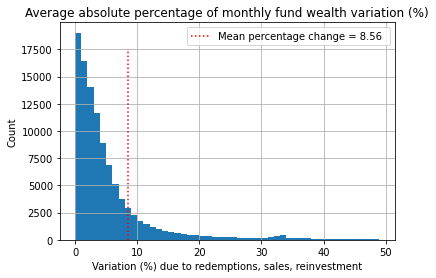

In [78]:
''' Distribution '''
import numpy as np

df['Flow1'] = abs((df['month_1_flow_redemption'] + df['month_1_flow_sales'] + df['month_1_flow_reinvestment']) / df['net_assets'])
df['Flow2'] = abs((df['month_2_flow_redemption'] + df['month_2_flow_sales'] + df['month_2_flow_reinvestment']) / df['net_assets'])
df['Flow3'] = abs((df['month_3_flow_redemption'] + df['month_3_flow_sales'] + df['month_3_flow_reinvestment']) / df['net_assets'])

df['FlowAvg'] = 100 * (df['Flow1'] / 3 + df['Flow2'] / 3 + df['Flow3'] / 3)
# df.replace([np.inf, -np.inf], np.nan,inplace=True)
print(df['FlowAvg'].mean())
# df['FlowAvg'] = df['FlowAvg'].apply(lambda x: [y if y <= 100 else 100 for y in x])
df['FlowAvg'].values[df['FlowAvg'] > 1000] = 1000
print(df['FlowAvg'].mean())

df.hist(column='FlowAvg', bins = range(0,50))
plt.title('Average absolute percentage of monthly fund wealth variation (%)')
plt.xlabel('Variation (%) due to redemptions, sales, reinvestment')
plt.ylabel('Count')
num = round(df['FlowAvg'].mean(),2)
plt.vlines(num, colors='r', ymin = 0, ymax = 17500, linestyles='dotted', label= 'Mean percentage change = %.2f ' % num)
plt.legend()
plt.show()


In [79]:
# WEALTH FLOWS (percent variation in NAV averaged across entities)



# what we can't do: pct_change over nav column.
# Because it would consider variations between funds that are not the same.
# Because also we have negative and 0.0 values. 
wrong_pct = df['net_assets'].pct_change().mean()
print(wrong_pct)

# Example for the first fund series_id:
df2 = df[df['series_id'] == 'S000000008']
tiny_pct = df2['net_assets'].pct_change().mean()
print(tiny_pct)
df2 = df[df['series_id'] == 'S000000040']
tiny_pct = df2['net_assets'].pct_change().mean()
print(tiny_pct)

# So, what we want is the average pct_change, iterating over different values of series_id.
# That would mean, construct a list (of pct changes) and get its mean.
# We iterate over all the rows of the dataset. If this new row has the same series id, append the pct change. Otherwise, don't.

pct_changes = []
print(len(df))

for i in range(len(df)):
    if i >= 1:
        if df['series_id'].iloc[i] == df['series_id'].iloc[i-1]:
            value =  abs((df['net_assets'].iloc[i] / df['net_assets'].iloc[i-1]) - 1)
            pct_changes.append(value)
        else:
            pass



inf
0.03024934419544174
0.04284103656910898
106693


59.69101206843053
0.12137535907230126
9.000000034725177


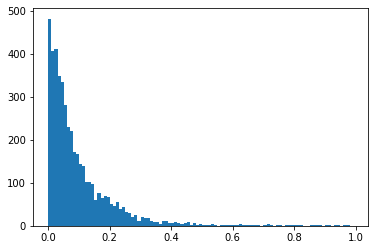

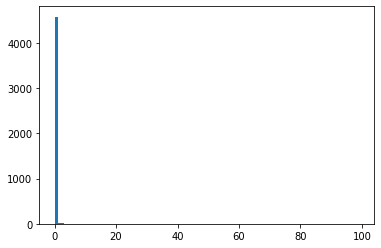

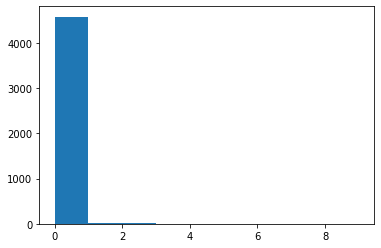

In [80]:
print(np.mean(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 10:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
plt.hist(pct_changes, bins = range(0,100))
plt.show()
plt.hist(pct_changes, bins = range(0,10))
plt.show()


In [81]:
print(np.nanmean(df['net_assets']))

2292630470.872589


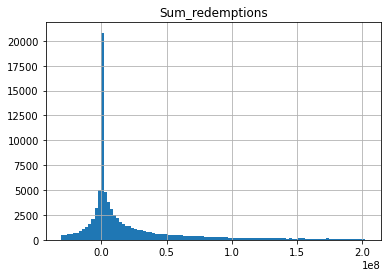

7.213856227190142


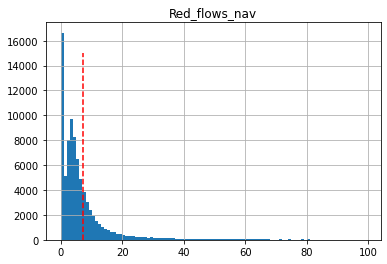

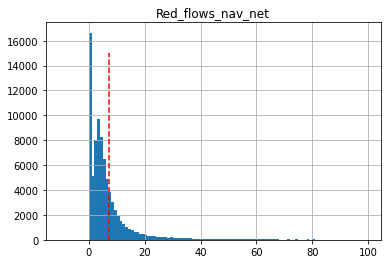

In [82]:
# Investment flows

df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df2 = pd.DataFrame()
df2["Sum_redemptions"] = df['Sum_redemptions']
df2["net_assets"] = df['net_assets']

# Sum redemptions histogram (excluding outliers)
df2 = df2[(df2["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df2["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]
df2.hist(column='Sum_redemptions', bins = 100)
plt.show()

# Ratio of redemptions to net asset values
df2 = df2[df2["net_assets"] > 0]

df2["Red_flows_nav"] = 100 * abs(df2["Sum_redemptions"]) / df2["net_assets"]
df2["Red_flows_nav_net"] = 100 * abs(df2["Sum_redemptions"]) / df2["net_assets"]
df2 = df2[df2["Red_flows_nav"] <= 100]
df2 = df2[df2["Red_flows_nav"] >= 0]
print(np.nanmean(df2["Red_flows_nav"]))

df2.hist(column='Red_flows_nav', bins = range(0,100))
plt.vlines(x=np.nanmean(df2["Red_flows_nav"]), ymin=0, ymax=15000, colors='red', linestyles='dashed')
plt.show()

df2.hist(column='Red_flows_nav_net', bins = range(-10,100))
plt.vlines(x=np.nanmean(df2["Red_flows_nav_net"]), ymin=0, ymax=15000, colors='red', linestyles='dashed')
plt.show()


Average quarterly ratio between redemptions and nav
2.541304836385038


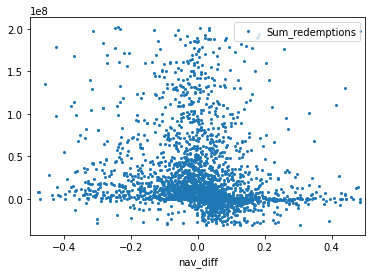

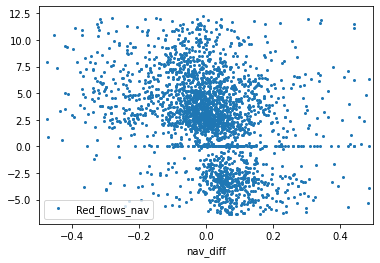

In [83]:
df = pd.read_csv(path)
df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df["Red_flows_nav"] = 100 * (df["Sum_redemptions"]) / df["net_assets"]
arr = [np.nan]
for i in range(len(df)):
    if i > 1:
        if df["series_id"].iloc[i] == df["series_id"].iloc[i-1]:
            arr.append((df["net_assets"].iloc[i] - df["Sum_redemptions"].iloc[i]) / df["net_assets"].iloc[i-1] - 1)
        else:
            arr.append(np.nan)
# print(arr)
arr.append(np.nan)
df["nav_diff"] = arr


df = df[(df["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]
df = df[(df["Red_flows_nav"] < df["Red_flows_nav"].quantile(q=0.9)) & (df["Red_flows_nav"] > df["Red_flows_nav"].quantile(q=0.1))]

print('Average quarterly ratio between redemptions and nav')
print(np.nanmean(df["Red_flows_nav"]))

df.plot(x='nav_diff', y='Sum_redemptions', style='o',ms=2, xlim=(-0.5,0.5))
plt.show()

df.plot(x='nav_diff', y='Red_flows_nav', style='o',ms=2, xlim=(-0.5,0.5))
plt.show()


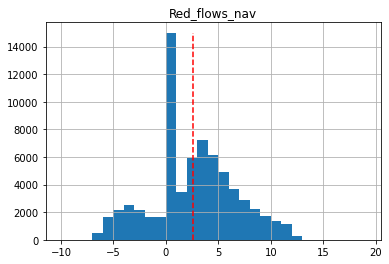

2.541304836385038


In [84]:
# Amount of investment 

df.hist(column='Red_flows_nav', bins = range(-10,20))
plt.vlines(x=np.nanmean(df["Red_flows_nav"]), ymin=0, ymax=15000, colors='red', linestyles='dashed')
plt.show()
print(np.nanmean(df["Red_flows_nav"]))

# In average, investment flows (quarterly) represent 2.54% of the fund's nav.
# There is a large variance: some funds have up to 10%.
# The distribution is very asymmetric and skewed towards inflows.

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_19616/3862808146.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]


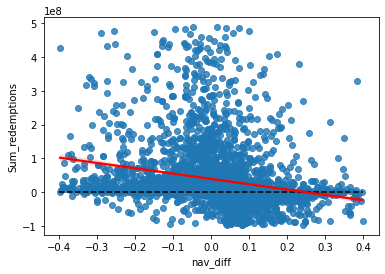

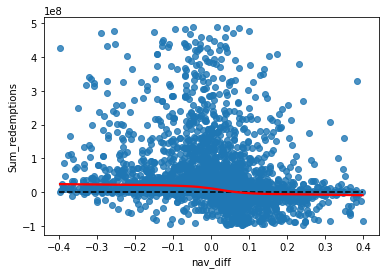

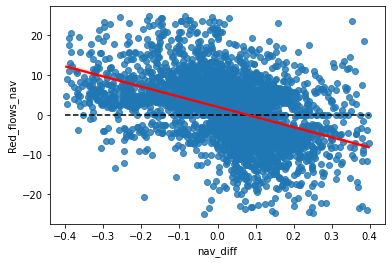

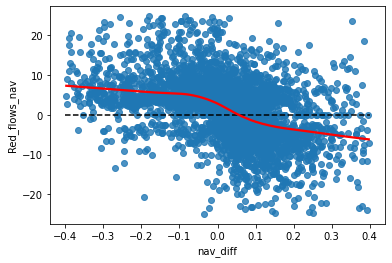

In [85]:
# Determinants of investment flows
# Are investment flows random? We hypothesise that they are not, and that investors are chasing performance in some way (momentum or contrarian).

df = pd.read_csv(path)
df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df["Red_flows_nav"] = 100 * (df["Sum_redemptions"]) / df["net_assets"]
arr = [np.nan]
for i in range(len(df)):
    if i > 1:
        if df["series_id"].iloc[i] == df["series_id"].iloc[i-1]:
            arr.append((df["net_assets"].iloc[i] - df["Sum_redemptions"].iloc[i]) / df["net_assets"].iloc[i-1] - 1)
        else:
            arr.append(np.nan)
# print(arr)
arr.append(np.nan)
df["nav_diff"] = arr

import seaborn as sns
df = df[(df["nav_diff"] <= 1.0) &  (df["nav_diff"] >= -1.0)]
df = df[abs(df["Red_flows_nav"]) <= 25]

df2 = pd.DataFrame()
df2["nav_diff"] = df["nav_diff"]
df2["Sum_redemptions"] = df["Sum_redemptions"]
df2["Red_flows_nav"] = df["Red_flows_nav"]

df3 = df2[(df2["nav_diff"] <= 0.4) & (df2["nav_diff"] >= -0.4)]
df4 = df3[(df["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]


# df3.plot(x='nav_diff', y='Sum_redemptions', style='o',ms=2)
# plt.show()

# sns.regplot(x="nav_diff", y="Sum_redemptions", data=df3,line_kws={"color": "red"})
# plt.show()
# sns.regplot(x="nav_diff", y="Sum_redemptions", lowess=True,data=df3, line_kws={"color": "red"})
# plt.show()

sns.regplot(x="nav_diff", y="Sum_redemptions", data=df4, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Sum_redemptions", lowess=True,data=df4, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Red_flows_nav", data=df3, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Red_flows_nav", lowess=True,data=df3, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()

In [86]:
# This is reallt interesting.
# If we had a linear positive relation between returns and investment, we would have a totally different line.
# We would have something crossing from bottom left to top right.
# We actually have the inverse!
# 1) This relates to the litterature showing that mutual funds investors are mostly contrarian.

# 2) There is important variance around rhe regression lines. 

# 3) The "response curve" is largely flat. It is surprising: outside of specific thresholds, there is little performance discrimination.
# e.g.: anywhere between -0.3 and -0.1, the difference in redemption flows is negligeable. 

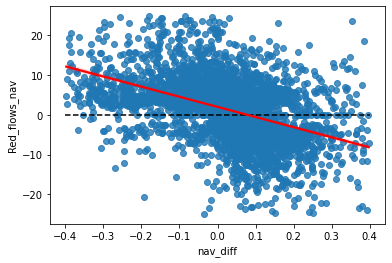

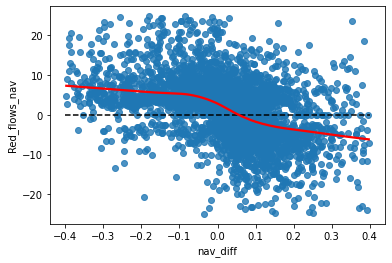

In [87]:
# Data preparation

df = pd.read_csv(path)
df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df["Red_flows_nav"] = 100 * (df["Sum_redemptions"]) / df["net_assets"]
arr = [np.nan]
for i in range(len(df)):
    if i > 1:
        if df["series_id"].iloc[i] == df["series_id"].iloc[i-1]:
            arr.append((df["net_assets"].iloc[i] - df["Sum_redemptions"].iloc[i]) / df["net_assets"].iloc[i-1] - 1)
        else:
            arr.append(np.nan)
# print(arr)
arr.append(np.nan)
df["nav_diff"] = arr
df = df[(df["nav_diff"] <= 1.0) &  (df["nav_diff"] >= -1.0)]
df = df[abs(df["Red_flows_nav"]) <= 25]
df2 = pd.DataFrame()
df2["nav_diff"] = df["nav_diff"]
df2["Sum_redemptions"] = df["Sum_redemptions"]
df2["Red_flows_nav"] = df["Red_flows_nav"]
df3 = df2[(df2["nav_diff"] <= 0.4) & (df2["nav_diff"] >= -0.4)]

# The data we work with:
# Quarterly net sum of redemptions = Sum Redemptions
# Percentage of quarterly redemptions sum to funds net asset value = quarterly variation of the fund wealth due to investment flows (in %)
# Data excludes outliers in quarterly returns (difference in nav)

sns.regplot(x="nav_diff", y="Red_flows_nav", data=df3, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Red_flows_nav", lowess=True,data=df3, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()



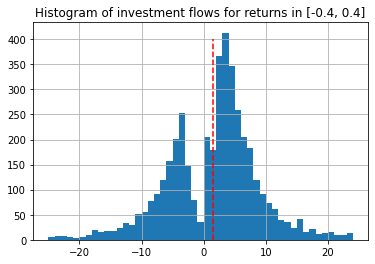

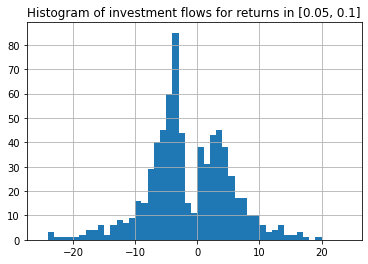

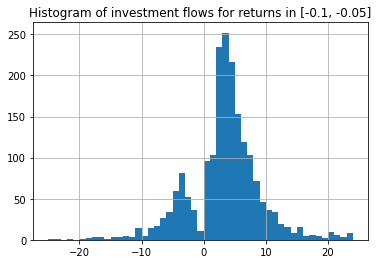

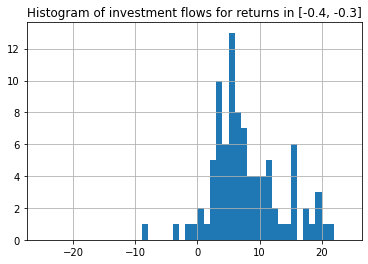

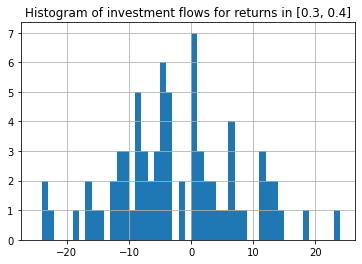

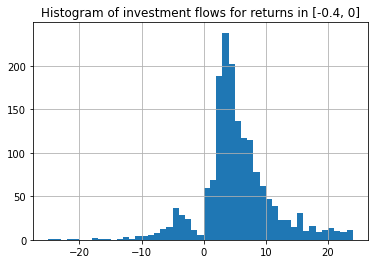

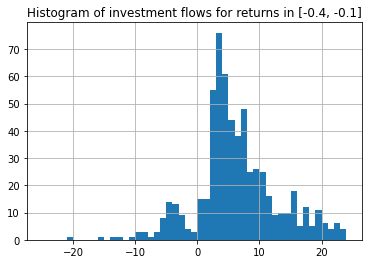

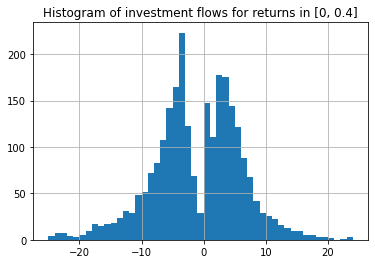

In [88]:
# Histogram of investment shares of quarterly nav variation
df3.hist(column='Red_flows_nav', bins = range(-25,25))
plt.vlines(x=np.nanmean(df3["Red_flows_nav"]), ymin=0, ymax=400, colors='red', linestyles='dashed')
plt.title('Histogram of investment flows for returns in [-0.4, 0.4]')
plt.show()

# Histogram of wealth flows for returns in [0.05, 0.1]
df4 = df3[(df3["nav_diff"] >= 0.05) & (df3["nav_diff"] <= 0.1)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [0.05, 0.1]')
plt.show()

# Histogram of wealth flows for returns in [-0.1, -0.05]
df4 = df3[(df3["nav_diff"] >= -0.1) & (df3["nav_diff"] <= 0.05)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [-0.1, -0.05]')
plt.show()

# Histogram of wealth flows for returns in [-0.4, -0.3]
df4 = df3[(df3["nav_diff"] >= -0.4) & (df3["nav_diff"] <= -0.3)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [-0.4, -0.3]')
plt.show()

# Histogram of wealth flows for returns in [0.3, 0.4]
df4 = df3[(df3["nav_diff"] >= 0.3) & (df3["nav_diff"] <= 0.4)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [0.3, 0.4]')
plt.show()

# Histogram of wealth flows for returns in [-0.4, 0]
df4 = df3[(df3["nav_diff"] >= -0.4) & (df3["nav_diff"] <= 0)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [-0.4, 0]')
plt.show()

# Histogram of wealth flows for returns in [-0.4, -0.1]
df4 = df3[(df3["nav_diff"] >= -0.4) & (df3["nav_diff"] <= -0.1)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [-0.4, -0.1]')
plt.show()

# Histogram of wealth flows for returns in [0, 0.4]
df4 = df3[(df3["nav_diff"] >= 0) & (df3["nav_diff"] <= 0.4)]
df4.hist(column='Red_flows_nav', bins = range(-25,25))
plt.title('Histogram of investment flows for returns in [0, 0.4]')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


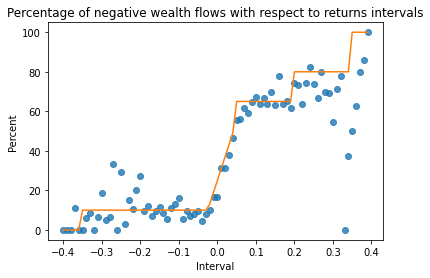

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


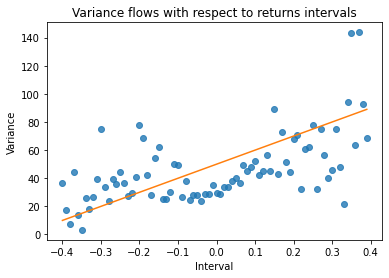

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


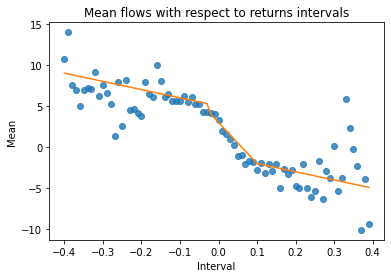

In [89]:
# How does the percentage of investment flow sign change with fund return?
import numpy as np

increment = 0.01
measures = []
intervals = []
flows = []
means = []
variance = []
start = -0.4
end = 0.4
running = start 

while running < end:
    interval_plus = 0
    interval_minus = 0
    flows = []
    for i in range(len(df3)):
        if df3["nav_diff"].iloc[i] >= running and df3["nav_diff"].iloc[i] < running + increment:

            flows.append(df3["Red_flows_nav"].iloc[i])

            if df3["Red_flows_nav"].iloc[i] > 0:
                interval_plus += 1
            elif df3["Red_flows_nav"].iloc[i] < 0:
                interval_minus += 1
            else:
                pass

    if interval_plus + interval_minus != 0:
        measures.append(100 * interval_minus / (interval_plus + interval_minus))
    else:
        measures.append(np.nan)

    # print(len(flows))
    if len(flows) != 0:
        variance.append(np.var(flows))
    else:
        variance.append(np.nan)
    means.append(np.nanmean(flows))
    del flows

    intervals.append(running)
    running += increment 

df4 = pd.DataFrame()
df4["Interval"] = intervals
df4["Percent"] = measures 
df4["Variance"] = variance
df4["Mean"] = means
# df4.plot(x=["Interval"], y=["Percent"])
# plt.show()

def sigmoid(x):
    if x < -0.35:
        y = 0
    elif x < -0.025:
        y = 10
    elif x < 0.05:
        y = x * 600 + 25
    elif x < 0.2:
        y = 65
    elif x < 0.35:
        y = 80
    else:
        y = 100
    return y

y = []
for x in intervals:
    y.append(sigmoid(x))

sns.regplot(x="Interval", y="Percent", fit_reg=False, data=df4, line_kws={"color": "red"})
sns.lineplot(intervals, y)
plt.title("Percentage of negative wealth flows with respect to returns intervals")
plt.show()

def variance(x):
    y = 100 * x + 50
    return y

y = []
for x in intervals:
    y.append(variance(x))

sns.regplot(x="Interval", y="Variance", fit_reg=False, data=df4, line_kws={"color": "red"})
sns.lineplot(intervals, y)
plt.title("Variance flows with respect to returns intervals")
plt.show()

def means(x):
    if x < -0.025:
        y = -10 * x + 5
    elif x < 0.1:
        y = -50 * x + 3
    else:
        y = -10 * x -1 
    return y

y = []
for x in intervals:
    y.append(means(x))

sns.regplot(x="Interval", y="Mean", fit_reg=False, data=df4, line_kws={"color": "red"})
sns.lineplot(intervals, y)
plt.title("Mean flows with respect to returns intervals")
plt.show()

# Step function and then we add noise?

# Or just: a normal draw with the step-approximation of means and step-approximation of variance.
# Issue: our approximation is done by hand. OLS for step regression estimation?

# Alternative: evolve GP functions
# Would they achieve better accuracy than our hand-coded approximation? This is possible.
# compute our accuracy (error), run some symbolic regression GP, compare the outcome.

# A GP function for the mean and variance?
# or a GP function for the distribution? (this is actually the same, except that this one is more numerical and could be more problematic...)

LinregressResult(slope=-25.498507370672314, intercept=2.000116620811408, rvalue=-0.4442099377580742, pvalue=3.5089661900486806e-204, stderr=0.7907275267071556, intercept_stderr=0.10300583605958874)
R-squared: 0.197322


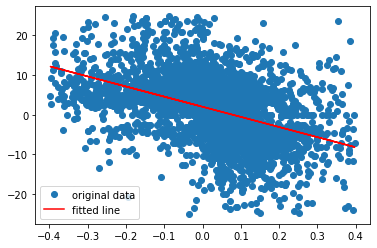

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getnewargs_ex__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_asdict', '_extra_fields', '_fields', 'count', 'index', 'intercept', 'intercept_stderr', 'pvalue', 'rvalue', 'slope', 'stderr']


In [90]:
from scipy import stats
x = df3["nav_diff"]
y = df3["Red_flows_nav"]
res = stats.linregress(x, y)

print(res)
print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

print(dir(res))
b = res.intercept
a = res.slope

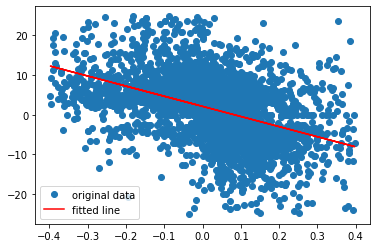

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_19616/631001948.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Fitted_flows"] = reconstructed_flows


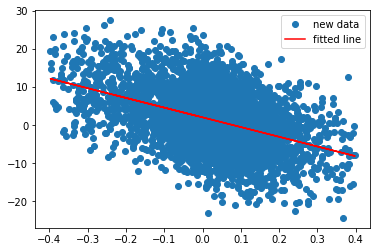

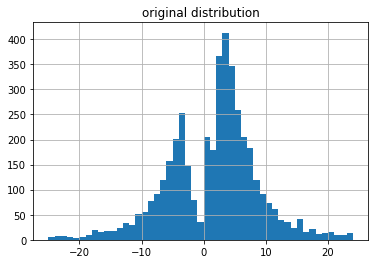

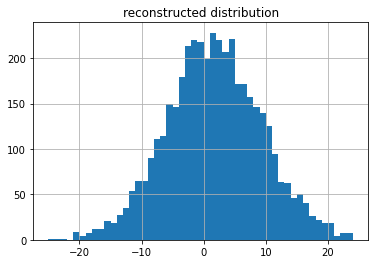

In [91]:
y = df3["Red_flows_nav"]
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x + np.random.normal(0,1), 'r', label='fitted line')
plt.legend()
plt.show()

# print(np.var(df3["Red_flows_nav"]))

reconstructed_flows = []
for item in x:
    value = res.intercept + res.slope * item + np.random.normal(0,7)
    reconstructed_flows.append(value)

df3["Fitted_flows"] = reconstructed_flows

# x = 
# y = 
plt.plot(df3["nav_diff"], df3["Fitted_flows"], 'o', label='new data')
plt.plot(df3["nav_diff"], res.intercept + res.slope*df3["nav_diff"], 'r', label='fitted line')
plt.legend()
plt.show()



df3.hist("Red_flows_nav", bins = range(-25,25))
plt.title("original distribution")
plt.show()

df3.hist("Fitted_flows", bins = range(-25,25))
plt.title("reconstructed distribution")
plt.show()


This shows an issue with our setup (linear regression + noise). We miss the ''hole'' in the middle of the distribution.

[-5.1757659   0.11920029]


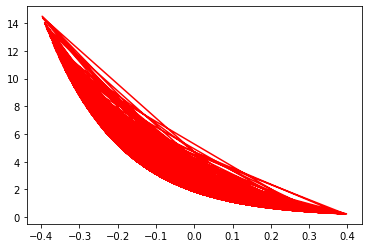

In [92]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return 1 / np.exp(-a * (x-b)) 

    # f(x) = 1/ 1 + e(-a(x-b))

popt, pcov = curve_fit(func, df3["nav_diff"], df3["Red_flows_nav"])
print(popt)
plt.plot(df3["nav_diff"], func(df3["nav_diff"], *popt), 'r-',
        label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.show()


def sigmoid(x):
    return 1 / np.exp(-popt[0] * (x-popt[1])) 

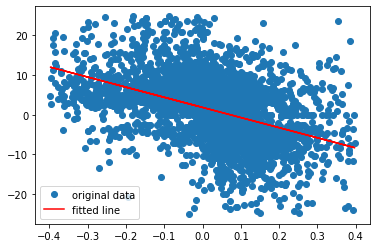

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_19616/1670057576.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Fitted_flows"] = reconstructed_flows


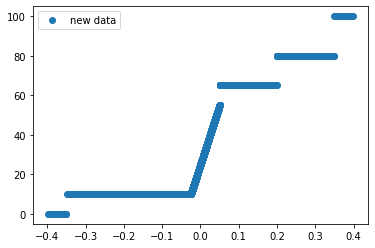

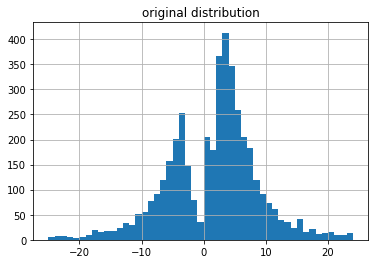

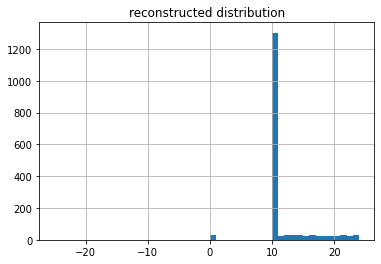

In [95]:

plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x + np.random.normal(0,1), 'r', label='fitted line')
plt.legend()
plt.show()

# print(np.var(df3["Red_flows_nav"]))

reconstructed_flows = []
for item in x:
    value = sigmoid(item) + np.random.normal(0,0)
    reconstructed_flows.append(value)

df3["Fitted_flows"] = reconstructed_flows

plt.plot(df3["nav_diff"], df3["Fitted_flows"], 'o', label='new data')
# plt.plot(df3["nav_diff"], sigmoid(df3["nav_diff"]), 'r', label='fitted line')
plt.legend()
plt.show()

df3.hist("Red_flows_nav", bins = range(-25,25))
plt.title("original distribution")
plt.show()

df3.hist("Fitted_flows", bins = range(-25,25))
plt.title("reconstructed distribution")
plt.show()
